- 通过设置kline_type为get_fermi_level计算Au primitive cell的费米能级

In [1]:
from dptb.postprocess.abstract_process import AbstractProcess

# from dptb.postprocess.bandstructure.band import Band
from dptb.nn.build import build_model
import numpy as np
from dptb.utils.loggers import set_log_handles
import logging
from pathlib import Path


model = build_model(checkpoint="nnsk.best.pth")
AtomicData_options={
        "r_max": 4.50,
        "er_max": 5.0,
        "oer_max": 2.5,
        "pbc": True
    }


results_path = "./band_plot"        
stru_data = "PRIMCELL.vasp"

log_path = results_path+'/log'
log_level = logging.INFO
set_log_handles(log_level, Path(log_path) if log_path else None)

AtomicData_options = AtomicData_options
nel_atom = {"Au":11}

ab_class = AbstractProcess(model=model,
            use_gui=True, 
            results_path=results_path, 
            device='cpu')
ab_class.get_fermi_level(data=stru_data, 
                nel_atom = nel_atom,
               kmesh=[30,30,30],
               AtomicData_options=AtomicData_options)



TBPLaS is not installed. Thus the TBPLaS is not available, Please install it first.
DEEPTB INFO    kmesh sampling: 14806 kpoints
/opt/mamba/envs/deeptb-dev/lib/python3.10/site-packages/torch/nested/__init__.py:58: UserWarning: The PyTorch API of nested tensors is in prototype stage and will change in the near future. (Triggered internally at ../aten/src/ATen/NestedTensorImpl.cpp:178.)
  return torch._nested_tensor_from_tensor_list(tensor_list, dtype, None, device, None)
DEEPTB INFO    Calculating Fermi energy in the case of spin-degeneracy.
DEEPTB INFO    Estimated E_fermi: -3.359685778617859 based on the valence electrons setting nel_atom : {'Au': 11} .


- 此外，我们可以通过抽象类得到指定k点的eigenvalues

In [2]:
from dptb.data import AtomicData, AtomicDataDict
import numpy as np
klist = np.array([[0., 0., 0.], [0.5, 0.5, 0.5]])   
ab_class.get_eigs(
    data=stru_data,
    klist=klist,
    AtomicData_options=AtomicData_options
)
ab_class.data[AtomicDataDict.ENERGY_EIGENVALUE_KEY][0]

tensor([[-1.3281e+01, -7.9629e+00, -7.9629e+00, -7.9629e+00, -6.4451e+00,
         -6.4451e+00,  3.2116e+00,  3.2116e+00,  3.2116e+00],
        [-1.0531e+01, -7.9875e+00, -7.9875e+00, -5.2479e+00, -5.2479e+00,
         -4.4246e+00, -4.5471e-03,  6.6235e+00,  6.6235e+00]],
       grad_fn=<SelectBackwardAutogradNestedTensor0>)

- 将kmesh模式下的费米能级写入task_options中，绘制能带

DEEPTB INFO    use input fermi energy: -3.359685, While the estimated value in line-mode is None


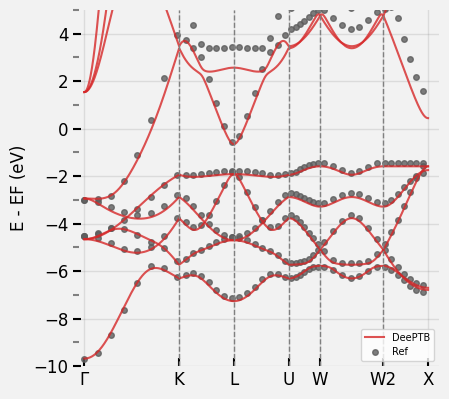

In [3]:
# band plot
from dptb.postprocess.bandstructure.band import Band
from dptb.nn.build import build_model

from dptb.utils.loggers import set_log_handles
import logging
from pathlib import Path


model = build_model(checkpoint="nnsk.best.pth")
task_options = {
        "task": "band",
        "kline_type":"abacus",
        "kpath":[[0., 0.,0,200], 
                [0.3750000000,	0.3750000000,	0.7500000000,200],
                [0.5000000000,	0.5000000000,	0.5000000000,200], 
                [0.6250000000,	0.2500000000,	0.6250000000,200],
                [0.5000000000,	0.2500000000,	0.7500000000,200],
                [0.7500000000,	0.2500000000,	0.5000000000,200],
                [0.5000000000,	0.0000000000,	0.5000000000,1]],
        "klabels":[r'$\Gamma$', 'K', 'L', 'U','W', 'W2', 'X'],
        "E_fermi": -3.359685,
        "emin":-10,
        "emax":5,
        "ref_band": "/personal/DFTB/Au_Ag/Au/data/kpath.0/eigenvalues.npy"
    }
AtomicData_options={
        "r_max": 3.0,
        "er_max": 5.0,
        "oer_max": 2.5,
        "pbc": True
    }

results_path = "./band_plot"        
kpath_kwargs = task_options
stru_data = "PRIMCELL.vasp"
AtomicData_options = AtomicData_options
bcal = Band(model=model,
            use_gui=True, 
            results_path=results_path, 
            device=model.device)
bcal.get_bands(data=stru_data, 
               kpath_kwargs=kpath_kwargs, 
               AtomicData_options=AtomicData_options)
bcal.band_plot(ref_band = kpath_kwargs["ref_band"],
               E_fermi = kpath_kwargs["E_fermi"],
               emin = kpath_kwargs["emin"],
               emax = kpath_kwargs["emax"])

- 以下为SIESTA在Au Primitive Cell上计算得到的能带和费米能级（Extracted by sisl package）
![jupyter](./siesta_band_plot.png)

- 如果不通过get_fermi_level而直接通过电子数填充能带的方式得到费米能级，结果如下所示,显然与SIESTA的计算结果不符

DEEPTB INFO    Estimated E_fermi: -1.018178939819336 based on the valence electrons setting nel_atom : {'Au': 11} .
DEEPTB INFO    The fermi energy is not provided, use the estimated value in line-mode: -1.018178939819336


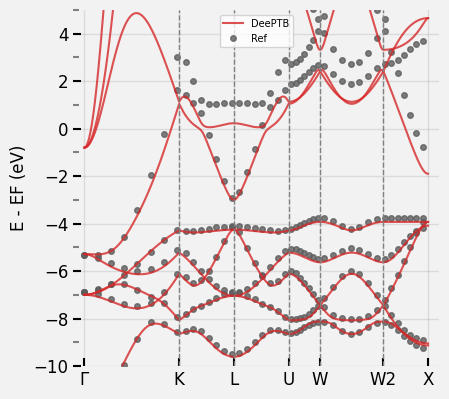

In [4]:
# band plot
task_options = {
        "task": "band",
        "kline_type":"abacus",
        "kpath":[[0., 0.,0,200], 
                [0.3750000000,	0.3750000000,	0.7500000000,200],
                [0.5000000000,	0.5000000000,	0.5000000000,200], 
                [0.6250000000,	0.2500000000,	0.6250000000,200],
                [0.5000000000,	0.2500000000,	0.7500000000,200],
                [0.7500000000,	0.2500000000,	0.5000000000,200],
                [0.5000000000,	0.0000000000,	0.5000000000,1]],
        "klabels":[r'$\Gamma$', 'K', 'L', 'U','W', 'W2', 'X'],
        "nel_atom":{"Au":11},
        "emin":-10,
        "emax":5,
        "ref_band": "/personal/DFTB/Au_Ag/Au/data/kpath.0/eigenvalues.npy"
    }
AtomicData_options={
        "r_max": 3.0,
        "er_max": 5.0,
        "oer_max": 2.5,
        "pbc": True
    }

results_path = "./band_plot"        
kpath_kwargs = task_options
stru_data = "PRIMCELL.vasp"
AtomicData_options = AtomicData_options
bcal = Band(model=model,
            use_gui=True, 
            results_path=results_path, 
            device=model.device)
bcal.get_bands(data=stru_data, 
               kpath_kwargs=kpath_kwargs, 
               AtomicData_options=AtomicData_options)
bcal.band_plot(ref_band = kpath_kwargs["ref_band"],
               emin = kpath_kwargs["emin"],
               emax = kpath_kwargs["emax"])